# Mini Taller / Evaluación 8

## Josué Venegas Almonacid, 201873534-5
## Link YouTube: https://youtu.be/LRSn7OPm4D0

Los superhéroes y sus aventuras son parte de la cultura popular desde hace ya varias décadas. A pesar de que normalmente están dotados de habilidades fuera de lo ordinario (?), estos personajes suelen ser un reflejo de los valores y tradiciones del mundo en que vivimos, de modo que analizar sus historias y características puede arrojar conclusiones interesantes acerca de las dinámicas inconscientes que permean la sociedad. 

En este taller analizaremos datos para explorar eventuales **sesgos de género** que podrían existir en el mundo de los superhéroes.


![texto alternativo](https://static.comicvine.com/uploads/original/11132/111329943/5990590-2478258-jl__11___page_16.jpg)



## Datos

Los datos con los que trabajará corresponden a una *muestra* de superhéroes extraídos de la base de datos *superherodb.com*, considerando sólo aquellos cuentan con descripciones suficientes para un análisis. El archivo *heroes_with_powers.csv* contiene información sobre los atributos físicos del personaje como raza, color de piel, color de ojos y género. Esta información fue cruzada con información cuantitativa sobre las habilidades del superhéroe, reducidas a 6 grandes categorías

> 'Intelligence', 'Strength', 'Speed', 'Durability', 'Power', 'Combat'

 Si les interesa, hay un dataset más detallado de habiidades en 'hero_pow_binary.csv', pero es binario y acá no lo usaremos.

Me esperaba una presencia más clara de géneros no-binarios o fluidos entre los supehéroes, pero domina la clasificación tradicional 'Male' - 'Female'. Hay 26 personajes sin clasificación, que se asumirán *NB* (non-binary). Una investigación más profunda quedará para el futuro.

Los superhéroes también se encuentran clasificados en términos de alineamiento valórico (columna 'Alignment'):

> bad, good, neutral

Se asumirá que "good" representa una predisposición al altruismo, el respeto por la vida, y la preocupación por la dignidad de los seres sensientes. 

Si lo desean, pueden encontrar más información sobre el dataset en *Kaggle*, una comunidad dedicada a la *ciencia de datos* y *machine learning*. https://www.kaggle.com

**Para facilitar su trabajo, los datos que necesita para cada actividad están disponibles en la sección "Desarrollo" indicando el número de la pregunta.**

In [ ]:
#Si carga los datos localmente no necesita ejecutar esta celda.
#Si los carga desde Drive, debe cambiar la ruta a la carpeta donde se encuentran. 

print("Mounting your Google Drive ...")

from google.colab import drive
drive.flush_and_unmount()
drive.mount('/content/drive',force_remount=True)
 
path = "/content/drive/My Drive/Colab Notebooks/"#Esta es la ruta


Mounting your Google Drive ...
Drive not mounted, so nothing to flush and unmount.
Mounted at /content/drive


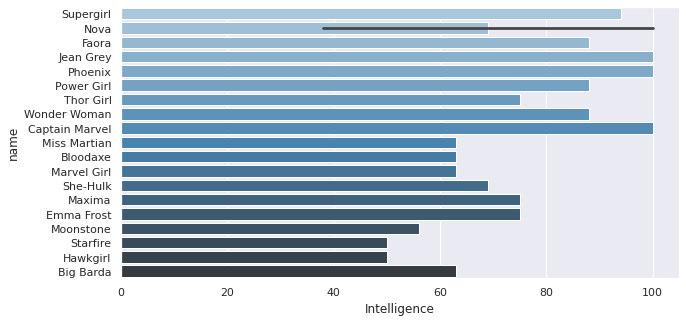

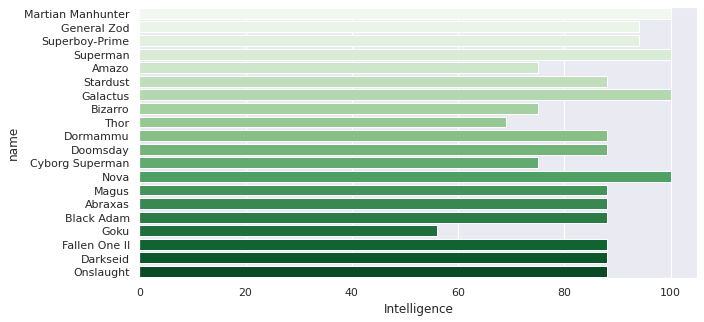

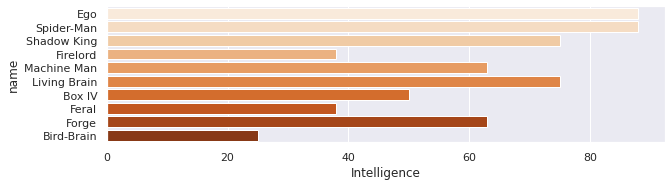

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

heroes_df = pd.read_csv(path+'heroes_with_powers.csv')
heroes_df.loc[(heroes_df.Gender != 'Female') & (heroes_df.Gender != 'Male'),'Gender'] = 'NB'
habilidades = ['Intelligence', 'Strength', 'Speed', 'Durability', 'Power', 'Combat']
sorted_df = heroes_df.iloc[heroes_df[habilidades].mean(axis=1).argsort()[::-1]]
sorted_df_w = sorted_df[sorted_df.Gender=='Female'].iloc[:20]
sorted_df_h = sorted_df[sorted_df.Gender=='Male'].iloc[:20]
sorted_df_nb = sorted_df[sorted_df.Gender=='NB'].iloc[:10]

fig, ax = plt.subplots(figsize=(10,5),nrows=1, sharey=True)
sns.barplot(data=sorted_df_w, x='Intelligence', y='name', palette="Blues_d",ax=ax)
fig, ax = plt.subplots(figsize=(10,5),nrows=1, sharey=True)
sns.barplot(data=sorted_df_h, x='Intelligence', y='name', palette="Greens", ax=ax)
fig, ax = plt.subplots(figsize=(10,2.5),nrows=1, sharey=True)
sns.barplot(data=sorted_df_nb, x='Intelligence', y='name', palette='Oranges', ax=ax)
plt.show()

## Funciones de Ayuda

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm, t
from scipy.stats import f as fisher

#H0: mu1 = mu0 (mu1 desconocida, m0 valor fijo)
def contrate_1media(n1,media1,std1,mu0,error_tipo1,alternativa='1>0'):
  region_critica = []
  gl = n1-1
  std_error = np.sqrt(std1**2/n1)
  T0 = (media1-mu0)/std_error#estadistico bajo H0
  if (alternativa=='1>0'):
    region_critica.append(pd.Interval(left=t.ppf(1-error_tipo1,df=gl), right=np.inf,closed='neither'))
    p_value = 1-t.cdf(T0,df=gl)
  elif (alternativa=='1<0'):
    region_critica.append(pd.Interval(left=-np.inf, right=t.ppf(error_tipo1,df=gl),closed='neither'))
    p_value = t.cdf(T0,df=gl)
  else:#dos colas
    region_critica.append(pd.Interval(left=-np.inf,right=t.ppf(error_tipo1/2,df=gl),closed='neither'))
    region_critica.append(pd.Interval(left=t.ppf(1-error_tipo1/2,df=gl),right=np.inf,closed='neither'))
    p_value = 2*min(1-t.cdf(T0,df=gl),t.cdf(T0,df=gl))
  return T0, region_critica, p_value


#H0: mu1 = mu2 (mu1,mu2 ambas no conocidas)
def contrate_2medias(n1,n2,media1,media2,std1,std2,error_tipo1,alternativa='1>2'):
  region_critica = []
  gl_num = (std1**2/float(n1) + std2**2/float(n2))**2
  gl_den = ((std1**2/float(n1))**2)/(n1-1.0) + ((std2**2/float(n2))**2)/(n2-1.0)
  gl = int(np.floor(gl_num/gl_den))
  std_error = np.sqrt(std1**2/n1 + std2**2/n2)
  T0 = (media1-media2)/std_error#estadistico bajo H0
  if (alternativa=='1>2'):
    region_critica.append(pd.Interval(left=t.ppf(1-error_tipo1,df=gl), right=np.inf,closed='neither'))
    p_value = 1-t.cdf(T0,df=gl)
  elif (alternativa=='1<2'):
    region_critica.append(pd.Interval(left=-np.inf, right=t.ppf(error_tipo1,df=gl),closed='neither'))
    p_value = t.cdf(T0,df=gl)
  else:#dos colas
    region_critica.append(pd.Interval(left=-np.inf,right=t.ppf(error_tipo1/2,df=gl),closed='neither'))
    region_critica.append(pd.Interval(left=t.ppf(1-error_tipo1/2,df=gl),right=np.inf,closed='neither'))
    p_value = 2*min(1-t.cdf(T0,df=gl),t.cdf(T0,df=gl))
  return T0, region_critica, p_value

#H0: sigma1 = sigma2 (sigma1,sigma2 ambas no conocidas)
def contrate_dos_varianzas(n1,n2,std1,std2,error_tipo1,alternativa='1>2'):
  region_critica = []
  F0 = std1**2/std2**2
  if (alternativa=='1>2'):
    region_critica.append(pd.Interval(left=fisher.ppf(1-error_tipo1,dfn=n1-1, dfd=n2-1), right=np.inf,closed='neither'))
    p_value = 1-fisher.cdf(F0,dfn=n1-1, dfd=n2-1)
  elif (alternativa=='1<2'):
    region_critica.append(pd.Interval(left=-np.inf, right=fisher.ppf(error_tipo1,dfn=n1-1, dfd=n2-1),closed='neither'))
    p_value = fisher.cdf(F0,dfn=n1-1, dfd=n2-1)
  else:#dos colas
    region_critica.append(pd.Interval(left=-np.inf,right=fisher.ppf(error_tipo1/2,dfn=n1-1, dfd=n2-1),closed='neither'))
    region_critica.append(pd.Interval(left=fisher.ppf(1-error_tipo1/2,dfn=n1-1, dfd=n2-1),right=np.inf,closed='neither'))
    p_value = 2*min(1-fisher.cdf(F0,dfn=n1-1, dfd=n2-1),fisher.cdf(F0,dfn=n1-1, dfd=n2-1))
  return F0, region_critica, p_value


#H0: p1 = p0 (p1 desconocida, p0 valor fijo)
def contrate_1prop(n1,prop1,p0,error_tipo1,alternativa='1>0'):
  region_critica = []
  std_error = np.sqrt(p0*(1.0-p0))*np.sqrt(1.0/n1)
  Z0 = (prop1-p0)/std_error
  if (alternativa=='1>0'):
    region_critica.append(pd.Interval(left=norm.ppf(1-error_tipo1), right=np.inf,closed='neither'))
    p_value = 1-norm.cdf(Z0)
  elif (alternativa=='1<0'):
    region_critica.append(pd.Interval(left=-np.inf, right=norm.ppf(error_tipo1),closed='neither'))
    p_value = norm.cdf(Z0)
  else:#dos colas
    region_critica.append(pd.Interval(left=-np.inf,right=norm.ppf(error_tipo1/2),closed='neither'))
    region_critica.append(pd.Interval(left=norm.ppf(1-error_tipo1/2),right=np.inf,closed='neither'))
    #print(">>",Z0,1-norm.cdf(Z0),norm.cdf(Z0))
    p_value = 2*min(1-norm.cdf(Z0),norm.cdf(Z0))
  return Z0, region_critica, p_value

#H0: p1 = p2 (p1,p2 no conocidas, ni funcion una de la otra)
def contrate_2props(n1,n2,prop1,prop2,error_tipo1,alternativa='1>2'):
  region_critica = []
  prop_comb = (n1*prop1 + n2*prop2)/(n1+n2)
  std_error = np.sqrt(prop_comb*(1.0-prop_comb))*np.sqrt(1.0/n1 + 1.0/n2)
  Z0 = (prop1-prop2)/std_error

  if (alternativa=='1>2'):
    region_critica.append(pd.Interval(left=norm.ppf(1-error_tipo1), right=np.inf,closed='neither'))
    p_value = 1-norm.cdf(Z0)
  elif (alternativa=='1<2'):
    region_critica.append(pd.Interval(left=-np.inf, right=norm.ppf(error_tipo1),closed='neither'))
    p_value = norm.cdf(Z0)
  else:#dos colas
    region_critica.append(pd.Interval(left=-np.inf,right=norm.ppf(error_tipo1/2),closed='neither'))
    region_critica.append(pd.Interval(left=norm.ppf(1-error_tipo1/2),right=np.inf,closed='neither'))
    #print(">>",Z0,1-norm.cdf(Z0),norm.cdf(Z0))
    p_value = 2*min(1-norm.cdf(Z0),norm.cdf(Z0))
  return Z0, region_critica, p_value


## Preguntas



**Al abordar las siguientes preguntas por favor indique claramente cuál es $H_0$, $H_1$, el estadístico de contraste y la región crítica. Razone también sobre el impacto de los diferentes factores involucrados en el resultado (tamaños muestrales, niveles de significación, etc)**





1.   Diseñe un contraste que permita evaluar la hipótesis de que *la proporción de personajes de género femenino en la población de super-héroes es menor al 30%*. Diseñe su contraste de manera que la probabilidad de aceptar incorrectamente esta conjetura es menor al 10%. Determine luego el tamaño mínimo que se puede adoptar en el contraste para aceptar la hipótesis alternativa (p-valor). Comente sobre significado del resultado.

2.   Diseñe un contraste que permita establecer si la proporción de personajes masculinos y femeninos difiere significativamente en la población de super-héroes. Determine el tamaño mínimo que se puede adoptar en el contraste para aceptar la hipótesis alternativa (p-valor). Comente el resultado.

3.  Diseñe un contraste que le permita determinar si el valor esperado de la habilidad de un super-héroe es igual entre personajes de diferentes géneros. Considere los casos Male-Female y Male-NB. Evalue su contraste (el mismo) para cada una de las 6 habilidades, adoptando un nivel de significación del 5%. 

4. Diseñe un contraste que le permita evaluar la hipótesis H de que la habilidad de un super-héroe femenino es mayor entre personajes con orientación hacia el mal. Evalue su contraste para cada una de las 6 habilidades, eligiendo la región crítica de modo que la probabilidad de aceptar incorrectamente la hipótesis sea menor al 5%.

Atención que los tamaños muestrales pueden cambiar cuando se estudian diferentes habilidades.



## Desarrollo

**Introducción**

Una hipótesis estadística es una asunción relativa a una o varias poblaciones, que puede ser cierta  o no. Las hipótesis estadísticas se pueden contrastar con la información extraída de las muestras y tanto si se aceptan como si se rechazan se puede cometer un error.

* alfa = p(rechazar H0|H0 cierta) => tipo 1 o falso positivo
* beta = p(aceptar H0|H0 falsa) => tipo 2 o falso negativo
* 1-beta = p(rechazar H0|H0 falsa) => potencia del contraste

En la mayoría de los casos es muy dificil calcular la probabilidad del error tipo II. La razón de esto se encuentra en la manera en que se formulan las hipótesis en una prueba estadística. Mientras que la hipótesis nula representa siempre una afirmación enérgica (como por ejemplo H0: «Promedio μ = 0») la hipótesis alternativa, debido a que engloba todas las otras posibilidades, es generalmente de naturaleza global (por ejemplo H1: «Promedio μ ≠ 0» )

La hipótesis formulada con intención de rechazarla se llama hipótesis nula y se expresa por H0. Representa la hipótesis que mantendremos a no ser que los datos indiquen su falsedad.
Rechazar H0 implica aceptar una hipótesis alternativa (H1).

**Pasos**
1. Establecer la hipótesis nula en términos de igualdad (Theta = valor)
2. Establecer la hipótesis alternativa, que puede hacerse de tres maneras: 
  - Theta != valor (dos colas o bilateral)
  - Theta < valor (lateral izquierdo)
  - Theta > valor (lateral derecho)
3. Elegir un nivel de significación
4. Elegir un estadístico de contraste: estadístico cuya distribución muestral se conozca en H0 y que esté relacionado con theta y establecer, en base a dicha distribución, la región crítica: región en la que el estadístico tiene una probabilidad menor que alfa si H0 fuera cierta y, en consecuencia, si el estadístico cayera en la misma, se rechazaría H0. Obsérvese que, de esta manera, se está más seguro cuando se rechaza una hipótesis que cuando no. Por eso se fija como H0 lo que se quiere rechazar. Cuando no se rechaza, no se ha demostrado nada, simplemente no se ha podido rechazar. 

5. Calcular el estadístico y compararlo con la región crítica, o equivalentemente, calcular el "valor p" del estadístico (probabilidad de obtener ese valor, u otro más alejado de la H0, si H0 fuera cierta) y compararlo con alfa.

**Respuestas**

1. Diseñe un contraste que permita evaluar la hipótesis de que la proporción de personajes de género femenino en la población de super-héroes es menor al 30%. Diseñe su contraste de manera que la probabilidad de aceptar incorrectamente esta conjetura es menor al 10%. Determine luego el tamaño mínimo que se puede adoptar en el contraste para aceptar la hipótesis alternativa (p-valor). Comente sobre significado del resultado.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

heroes_df = pd.read_csv(path+'heroes_with_powers.csv')
heroes_df.loc[(heroes_df.Gender != 'Female') & (heroes_df.Gender != 'Male'),'Gender'] = 'NB'
heroes_HOMBRE = heroes_df[heroes_df.Gender == 'Male'].copy()
heroes_MUJER = heroes_df[heroes_df.Gender == 'Female'].copy()
heroes_NB = heroes_df[heroes_df.Gender == 'NB'].copy()

#PREGUNTAS 1, 2

N_HOMBRE = len(heroes_HOMBRE)#numero total de hombres
N_MUJER = len(heroes_MUJER)#numero total de mujeres
N_NB = len(heroes_NB)#numero total de NB
N_total = N_HOMBRE + N_MUJER + N_NB

#Definimos:
#X: proporción de personajes femeninos en la población de super-héroes

#H0: la proporción de personajes de género femenino en la población de super-héroes es mayor o 
#igual al 30%
#H1: la proporción de personajes de género femenino en la población de super-héroes es menor al 30%

#H0: p >= 30% => H0: p = 30%
#H1: p < 30% (lateral)

#Equivocarse: aceptar incorrectamente H1
#Equivocarse: rechazar incorrectamente H0 => Tipo 1
#Probabilidad < 10%

#Con los datos que tenemos usaremos "Para una proporción p1 desconocida"
print("Proporción:", round(N_MUJER/N_total*100, 1), "%")

################################################################################
error_tipo_1 = 0.1
T0, region_critica, p_value = contrate_1prop(N_total, N_MUJER/N_total, 0.3, error_tipo_1, alternativa='1<0')
result = "La proporción de personajes de género femenino en la población de super-héroes es menor al 30%" if np.any([T0 in region for region in region_critica]) else "No podemos rechazar que la proporción de personajes de género femenino en la población de super-héroes es igual al 30%"

print("-------------------------------------------------------------------------------------------------------------")
print("Error tipo 1:", error_tipo_1)
print("Estadístico:", T0)
print("Región Crítica:", [str(region) for region in region_critica])
print("\nDecisión:", result)
print("p-value:", p_value)

#El p-value indica el umbral en que el estadístico pasa a estar dentro o fuera de la región de
#aceptación, por lo que para poder notar una diferencia más significativa en los resultados
#deberíamos disminuir el error de significación. Variar el tamaño mínimo afectará el tamaño de la 
#región crítica (tamaño del contraste menor implica región crítica menor), sin embargo,
#disminuir la probabilidad del error de tipo I, α, conduce a incrementar la probabilidad del error de 
#tipo II, β.
################################################################################
error_tipo_1 = 0.038
T0, region_critica, p_value = contrate_1prop(N_total, N_MUJER/N_total, 0.3, error_tipo_1, alternativa='1<0')
result = "La proporción de personajes de género femenino en la población de super-héroes es menor al 30%" if np.any([T0 in region for region in region_critica]) else "No podemos rechazar que la proporción de personajes de género femenino en la población de super-héroes es igual al 30%"

print("-------------------------------------------------------------------------------------------------------------")
print("Error tipo 1:", error_tipo_1)
print("Estadístico:", T0)
print("Región Crítica:", [str(region) for region in region_critica])
print("\nDecisión:", result)
print("p-value:", p_value)

################################################################################
error_tipo_1 = 0.036
T0, region_critica, p_value = contrate_1prop(N_total, N_MUJER/N_total, 0.3, error_tipo_1, alternativa='1<0')
result = "La proporción de personajes de género femenino en la población de super-héroes es menor al 30%" if np.any([T0 in region for region in region_critica]) else "No podemos rechazar que la proporción de personajes de género femenino en la población de super-héroes es igual al 30%"

print("-------------------------------------------------------------------------------------------------------------")
print("Error tipo 1:", error_tipo_1)
print("Estadístico:", T0)
print("Región Crítica:", [str(region) for region in region_critica])
print("\nDecisión:", result)
print("p-value:", p_value)

Proporción: 26.7 %
-------------------------------------------------------------------------------------------------------------
Error tipo 1: 0.1
Estadístico: -1.7817416127494954
Región Crítica: ['(-inf, -1.2815515655446004)']

Decisión: La proporción de personajes de género femenino en la población de super-héroes es menor al 30%
p-value: 0.03739568879347213
-------------------------------------------------------------------------------------------------------------
Error tipo 1: 0.038
Estadístico: -1.7817416127494954
Región Crítica: ['(-inf, -1.7743819103449574)']

Decisión: La proporción de personajes de género femenino en la población de super-héroes es menor al 30%
p-value: 0.03739568879347213
-------------------------------------------------------------------------------------------------------------
Error tipo 1: 0.036
Estadístico: -1.7817416127494954
Región Crítica: ['(-inf, -1.7991181068379674)']

Decisión: No podemos rechazar que la proporción de personajes de género femenin

2. Diseñe un contraste que permita establecer si la proporción de personajes masculinos y femeninos difiere significativamente en la población de super-héroes. Determine el tamaño mínimo que se puede adoptar en el contraste para aceptar la hipótesis alternativa (p-valor). Comente el resultado.

In [ ]:
N_total = N_HOMBRE + N_MUJER

#Definimos:
#X: proporción de personajes femeninos en la población de super-héroes
#Y: proporción de personajes masculinos en la población de super-héroes

#H0: la proporción de personajes masculinos y femeninos no difiere significativamente
#H1: la proporción de personajes masculinos y femeninos difiere significativamente

#H0: pM == pF (bilateral)
#H1: pM != pF

#Con los datos que tenemos usaremos "p1,p2 no conocidas, ni funcion una de la otra"
print("Proporción Masculinos:", round(N_HOMBRE/N_total*100, 1), "%")
print("Proporción Femeninos:", round(N_MUJER/N_total*100, 1), "%")

################################################################################
error_tipo_1 = 0.1
Z0, region_critica, p_value = contrate_2props(N_total, N_total, N_MUJER/N_total, N_HOMBRE/N_total, error_tipo_1, alternativa="")
result = "La proporción de personajes masculinos y femeninos difiere significativamente" if np.any([Z0 in region for region in region_critica]) else "No podemos rechazar que la proporción de personajes masculinos y femeninos no difiere significativamente"

print("-------------------------------------------------------------------------------------------------------------")
print("Error tipo 1:", error_tipo_1)
print("Estadístico:", Z0)
print("Región Crítica:", [str(region) for region in region_critica])
print("\nDecisión:", result)
print("p-value:", p_value)

################################################################################
error_tipo_1 = 2.035e-51
Z0, region_critica, p_value = contrate_2props(N_total, N_total, N_MUJER/N_total, N_HOMBRE/N_total, error_tipo_1, alternativa="")
result = "La proporción de personajes masculinos y femeninos difiere significativamente" if np.any([Z0 in region for region in region_critica]) else "No podemos rechazar que la proporción de personajes masculinos y femeninos no difiere significativamente"

print("-------------------------------------------------------------------------------------------------------------")
print("Error tipo 1:", error_tipo_1)
print("Estadístico:", Z0)
print("Región Crítica:", [str(region) for region in region_critica])
print("\nDecisión:", result)
print("p-value:", p_value)

################################################################################
error_tipo_1 =  2.033e-51
Z0, region_critica, p_value = contrate_2props(N_total, N_total, N_MUJER/N_total, N_HOMBRE/N_total, error_tipo_1, alternativa="")
result = "La proporción de personajes masculinos y femeninos difiere significativamente" if np.any([Z0 in region for region in region_critica]) else "No podemos rechazar que la proporción de personajes masculinos y femeninos no difiere significativamente"

print("-------------------------------------------------------------------------------------------------------------")
print("Error tipo 1:", error_tipo_1)
print("Estadístico:", Z0)
print("Región Crítica:", [str(region) for region in region_critica])
print("\nDecisión:", result)
print("p-value:", p_value)

Proporción Masculinos: 72.2 %
Proporción Femeninos: 27.8 %
-------------------------------------------------------------------------------------------------------------
Error tipo 1: 0.1
Estadístico: -15.084944665313014
Región Crítica: ['(-inf, -1.6448536269514729)', '(1.6448536269514722, inf)']

Decisión: La proporción de personajes masculinos y femeninos difiere significativamente
p-value: 2.034451280132043e-51
-------------------------------------------------------------------------------------------------------------
Error tipo 1: 2.035e-51
Estadístico: -15.084944665313014
Región Crítica: ['(-inf, -15.08492686558489)', '(inf, inf)']

Decisión: La proporción de personajes masculinos y femeninos difiere significativamente
p-value: 2.034451280132043e-51
-------------------------------------------------------------------------------------------------------------
Error tipo 1: 2.033e-51
Estadístico: -15.084944665313014
Región Crítica: ['(-inf, -15.084991765921396)', '(inf, inf)']

Decis

3. Diseñe un contraste que le permita determinar si el valor esperado de la habilidad de un super-héroe es igual entre personajes de diferentes géneros. Considere los casos Male-Female y Male-NB. Evalue su contraste (el mismo) para cada una de las 6 habilidades, adoptando un nivel de significación del 5%.

In [ ]:
#PREGUNTA 3

#Definimos:
#X_M: valor esperado de la habilidad X para un super-héroe Masculino
#X_F: valor esperado de la habilidad X para un super-héroe Femenino
#X_N: valor esperado de la habilidad X para un super-héroe No Binario

#H0: El valor esperado de la habilidad del personaje no es igual entre personajes de diferentes géneros
#H1: El valor esperado de la habilidad del personaje es igual entre personajes de diferentes géneros

#H0: mu1 != m2
#H1: mu1 == m2 (bilateral)

#Asumiendo normalidad, el valor esperado se puede obtener mediante la media, por lo que usaremos 
#mu1 = mu2 (mu1,mu2 ambas no conocidas)

habilidades = ['Intelligence', 'Strength', 'Speed', 'Durability', 'Power', 'Combat']
for idx,habilidad in enumerate(habilidades):

  VALORES_HOMBRES = heroes_HOMBRE.loc[heroes_HOMBRE[habilidad]!=1,habilidad].dropna() #1 es desconocido, eliminar
  VALORES_MUJERES = heroes_MUJER.loc[heroes_MUJER[habilidad]!=1,habilidad].dropna()#1 es desconocido, eliminar
  VALORES_NB = heroes_NB.loc[heroes_NB[habilidad]!=1,habilidad].dropna()#1 es desconocido, eliminar

  PROMEDIO_HOMBRES = VALORES_HOMBRES.values.mean()
  PROMEDIO_MUJERES = VALORES_MUJERES.values.mean()
  PROMEDIO_NB = VALORES_NB.values.mean()

  S2_HOMBRES = VALORES_HOMBRES.values.std(ddof=1)#varianza muestral
  S2_MUJERES = VALORES_MUJERES.values.std(ddof=1)
  S2_NB = VALORES_NB.values.std(ddof=0)

  N_HOMBRES = len(VALORES_HOMBRES)
  N_MUJERES = len(VALORES_MUJERES)
  N_NB = len(VALORES_NB)


  total_m_f = N_HOMBRES+N_MUJERES 
  total_m_nb = N_HOMBRES+N_NB
  error_tipo_1 = 0.05

  print(".................................................................................................................................................")
  print("[",habilidad,"]")
  print("Hombres: \tMedia=%.2f \tS2=%.2f \tN=%d"%(PROMEDIO_HOMBRES,S2_HOMBRES,N_HOMBRES))
  print("Mujeres  : \tMedia=%.2f \tS2=%.2f, \tN=%d"%(PROMEDIO_MUJERES,S2_MUJERES,N_MUJERES))
  
  Z0, region_critica, p_value = contrate_2medias(total_m_f, total_m_f, PROMEDIO_MUJERES, PROMEDIO_HOMBRES, S2_MUJERES, S2_HOMBRES, error_tipo_1, alternativa="")
  result = "El valor esperado de la {} del personaje es igual entre personajes hombres y mujeres".format(habilidad) if np.any([Z0 in region for region in region_critica]) else "No podemos rechazar que el valor esperado de la {} del personaje no es igual entre entre personajes hombres y mujeres".format(habilidad)

  print("\nError tipo 1:", error_tipo_1)
  print("Estadístico:", Z0)
  print("Región Crítica:", [str(region) for region in region_critica])
  print("\nDecisión:", result)
  print("p-value:", p_value)

  print(".................................................................................................................................................")
  print("[",habilidad,"]")
  print("Hombres: \tMedia=%.2f \tS2=%.2f \tN=%d"%(PROMEDIO_HOMBRES,S2_HOMBRES,N_HOMBRES))
  print("NB         : \tMedia=%.2f \tS2=%.2f \tN=%d"%(PROMEDIO_NB,S2_NB,N_NB))
  Z0, region_critica, p_value = contrate_2medias(total_m_nb, total_m_nb, PROMEDIO_NB, PROMEDIO_HOMBRES, S2_NB, S2_HOMBRES, error_tipo_1, alternativa="")
  result = "El valor esperado de la {} del personaje es igual entre personajes hombres y no binarios".format(habilidad) if np.any([Z0 in region for region in region_critica]) else "No podemos rechazar que el valor esperado de la {} del personaje no es igual entre entre personajes hombres y no binarios".format(habilidad)

  print("\nError tipo 1:", error_tipo_1)
  print("Estadístico:", Z0)
  print("Región Crítica:", [str(region) for region in region_critica])
  print("\nDecisión:", result)
  print("p-value:", p_value)

.................................................................................................................................................
[ Intelligence ]
Hombres: 	Media=64.16 	S2=21.56 	N=308
Mujeres  : 	Media=60.40 	S2=17.09, 	N=111

Error tipo 1: 0.05
Estadístico: -2.799424563797419
Región Crítica: ['(-inf, -1.9629562138495296)', '(1.9629562138495291, inf)']

Decisión: El valor esperado de la Intelligence del personaje es igual entre personajes hombres y mujeres
p-value: 0.005243595168801109
.................................................................................................................................................
[ Intelligence ]
Hombres: 	Media=64.16 	S2=21.56 	N=308
NB         : 	Media=58.27 	S2=20.85 	N=11

Error tipo 1: 0.05
Estadístico: -3.505502746306031
Región Crítica: ['(-inf, -1.9637068545475131)', '(1.9637068545475127, inf)']

Decisión: El valor esperado de la Intelligence del personaje es igual entre personajes hombres y no binarios
p-value:

4. Diseñe un contraste que le permita evaluar la hipótesis H de que la habilidad de un super-héroe femenino es mayor entre personajes con orientación hacia el mal. Evalue su contraste para cada una de las 6 habilidades, eligiendo la región crítica de modo que la probabilidad de aceptar incorrectamente la hipótesis sea menor al 5%.

In [ ]:
#PREGUNTA 4

# Definimos:
#X_n: valor esperado de la habilidad X de un super-héroe femenino n

# H0: la habilidad de un super-héroe femenino no es mayor entre personajes con orientación hacia el mal
# H1: la habilidad de un super-héroe femenino es mayor entre personajes con orientación hacia el mal

#H0: hM <= hB => H0: hM = hB
#H1: hM > hB (lateral)

habilidades = ['Intelligence', 'Strength', 'Speed', 'Durability', 'Power', 'Combat']
gender_analizar = 'Female'
for idx,habilidad in enumerate(habilidades):

  VALORES_HEROES = heroes_df.loc[(heroes_df['Gender']==gender_analizar) & (heroes_df[habilidad]!=1) & (heroes_df['Alignment']=='good'),habilidad].dropna()#1 es desconocido, eliminar
  VALORES_VILLANOS = heroes_df.loc[(heroes_df['Gender']==gender_analizar) & (heroes_df[habilidad]!=1) & (heroes_df['Alignment']=='bad'),habilidad].dropna()#1 es desconocido, eliminar
  
  PROMEDIO_HEROES = VALORES_HEROES.values.mean()
  PROMEDIO_VILLANOS = VALORES_VILLANOS.values.mean()

  S_HEROES = VALORES_HEROES.values.std(ddof=1)
  S_VILLANOS = VALORES_VILLANOS.values.std(ddof=1)

  N_HEROES = len(VALORES_HEROES)
  N_VILLANOS = len(VALORES_VILLANOS)

  N_total = N_HEROES+N_VILLANOS
  error_tipo_1 = 0.04
  
  print(".................................................................................................................................................")
  print("[",habilidad,"]")
  print(gender_analizar,"Villanos, Media=%.2f, S2=%.2f, N=%d"%(PROMEDIO_VILLANOS,S_VILLANOS,N_VILLANOS))
  print(gender_analizar,"Heroes, Media=%.2f, S2=%.2f, N=%d"%(PROMEDIO_HEROES,S_HEROES,N_HEROES))
  Z0, region_critica, p_value = contrate_2medias(N_total, N_total, PROMEDIO_HEROES, PROMEDIO_VILLANOS, S_HEROES, S_VILLANOS, error_tipo_1, alternativa="1<2")
  result = "La {} de un super-héroe femenino es mayor entre personajes con orientación hacia el mal".format(habilidad) if np.any([Z0 in region for region in region_critica]) else "No podemos rechazar que la {} de un super-héroe femenino no es mayor entre personajes con orientación hacia el mal".format(habilidad)

  print("\nError tipo 1:", error_tipo_1)
  print("Estadístico:", Z0)
  print("Región Crítica:", [str(region) for region in region_critica])
  print("\nDecisión:", result)
  print("p-value:", p_value)

.................................................................................................................................................
[ Intelligence ]
Female Villanos, Media=63.35, S2=16.85, N=20
Female Heroes, Media=59.86, S2=17.23, N=90

Error tipo 1: 0.04
Estadístico: -1.5207451205702762
Región Crítica: ['(-inf, -1.7589231281656847)']

Decisión: No podemos rechazar que la Intelligence de un super-héroe femenino no es mayor entre personajes con orientación hacia el mal
p-value: 0.06488978322583952
.................................................................................................................................................
[ Strength ]
Female Villanos, Media=40.60, S2=34.45, N=20
Female Heroes, Media=33.21, S2=30.85, N=90

Error tipo 1: 0.04
Estadístico: -1.675851274847191
Región Crítica: ['(-inf, -1.7590001144945073)']

Decisión: No podemos rechazar que la Strength de un super-héroe femenino no es mayor entre personajes con orientación hacia el mal
p-va

## Conclusiones

No olvide esta sección. 
Escriba conlusiones que resuman los principales hallazgos del taller.

Si bien se puede tener un acercamiento superficial a los resultados por medio del cálculo de valores característicos (como la media aritmética) o medidas de dispersión (como la varianza o la desviación estándar), éstos no son infalibles, pues representan un análisis acotado a la muestra. Sin embargo, el análisis mediante contrastes de hipótesis representa una forma de verificar si la información recopilada de una muestra es suficiente para confirmar o rechazar una afirmación sobre una población.

El p-value es un parámetro que se puede obtener a partir del contraste, e indica el umbral en que el estadístico pasa a estar dentro o fuera de la región de aceptación, por lo que para poder notar una diferencia más significativa en los resultados deberíamos disminuir el error de significación. Variar el tamaño mínimo afectará el tamaño de la región crítica (tamaño del contraste menor implica región crítica menor), sin embargo, disminuir la probabilidad del error de tipo I, α, conduce a incrementar la probabilidad del error de tipo II, β.

Tras analizar diversos atributos de un conjunto de datos de super-héroes, entre los que destacan género, inteligencia, fuerza, velocidad, durabilidad, poder, combate y alineamiento valórico, se han obtenido los siguientes resultados:

Con un error tipo 1 del 10%, existe fuerte evidencia de que la proporción de personajes de género femenino en la población de super-héroes es menor al 30%, con un p-value aproximado de 0.037.

Similarmente, un estudio de la proporción entre super-héroes masculinos y femeninos sugiere que la proporción de personajes masculinos y femeninos difiere, lo cual, complementado con el resultado anteriormente señalado, indicaría que dichas cantidades son significativamente distintos, con un p-value de 2.03e-51 y un nivel de significación del 10%.

En cuanto a las habilidades de los super-héroes, con un error tipo 1 del 5% se insinúa que el valor esperado de la inteligencia es igual entre personajes hombres y mujeres (p-value: 0.005), así como de la fuerza (1.46e-05), velocidad (0.0002), durabilidad (8.57e-11), poder (0.0025) y combate (0.0029). Sin embargo, entre personajes masculinos y no-binarios el escenario varía, con valores esperados iguales en inteligencia (0.0004), fuerza (0.03), poder (1.60e-31) y combate (8.16e-14), pero sin evidencia suficiente para rechazar diferencia en velocidad (0.111) y durabilidad (0.418).

Finalmente, no podemos rechazar que las habilidades no son mayores entre personajes con orientación hacia el mal (con p-values de inteligencia: 0.064, fuerza: 0.0476, velocidad: 0.987, durabilidad: 0.389, poder: 0.218 y combate: 0.384), probablemente esto se deba a la poca cantidad de datos recolectados para esta categoría.





Además, por favor no ovide:



1.   **Cambiar el nombre de este notebook indentificándolo con su nombre y apellido o con su rol@usm para evitar duplicados.**

2.   **Incluir el link al video explicativo dentro de este notebook.**


# Referencias

* Hospital Universitario Ramón y Cajal. (s. f.). Contrastes de hipótesis. http://www.hrc.es/bioest/Introducion_ch.html
* Colaboradores de Wikipedia. (2020, 7 septiembre). Contraste de hipótesis. Wikipedia, la enciclopedia libre. https://es.wikipedia.org/wiki/Contraste_de_hipótesis
* Colaboradores de Wikipedia. (2020, 6 mayo). Errores de tipo I y de tipo II. Wikipedia, la enciclopedia libre. https://es.wikipedia.org/wiki/Errores_de_tipo_I_y_de_tipo_II

